In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
#read in the data
data1 = pd.read_csv("data/corona_tested_individuals_ver_006_march_april.english.csv")
data2 = pd.read_csv("data/corona_tested_individuals_ver_0083_september_november.english.csv")

/var/folders/kt/92wnzvcj6qq_r6j3j19yp5lw0000gp/T/ipykernel_10129/581540614.py:2: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("data/corona_tested_individuals_ver_006_march_april.english.csv")
/var/folders/kt/92wnzvcj6qq_r6j3j19yp5lw0000gp/T/ipykernel_10129/581540614.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("data/corona_tested_individuals_ver_0083_september_november.english.csv")


In [97]:
# Take the processing function from hackathon_lgbm.ipynb to process the 0083 data

def prepareData(X):
    X = X.dropna()
    X = X.copy().query('gender != "None"')
    X = X.query('corona_result != "other"')
    X['test_indication'] = X['test_indication'].map({'Contact with confirmed': 1, 'Other': 0, 'Abroad': 0})
    X['age_60_and_above'] = X['age_60_and_above'].map({'Yes': 1, 'No': 0})
    X['gender'] = X['gender'].map({'male': 1, 'female': 0})
    X['corona_result'] = X['corona_result'].map({'positive': 1, 'negative': 0})
    X = X.copy().query('cough != "None"')
    X = X.copy().query('fever != "None"')
    X = X.copy().query('sore_throat != "None"')
    X = X.copy().query('shortness_of_breath != "None"')
    X = X.copy().query('head_ache != "None"')
    X['cough'] = X['cough'].astype(int)
    X['fever'] = X['fever'].astype(int)
    X['sore_throat'] = X['sore_throat'].astype(int)
    X['shortness_of_breath'] = X['shortness_of_breath'].astype(int)
    X['head_ache'] = X['head_ache'].astype(int)
    X['gender'] = X['gender'].astype(int)
    X = X.drop(['test_date'],axis = 1)
    return X

In [59]:
data_processed1 = prepareData(data1)
data_processed2 = prepareData(data2)

/var/folders/kt/92wnzvcj6qq_r6j3j19yp5lw0000gp/T/ipykernel_10129/3264763642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['test_indication'] = X['test_indication'].map({'Contact with confirmed': 1, 'Other': 0, 'Abroad': 0})
/var/folders/kt/92wnzvcj6qq_r6j3j19yp5lw0000gp/T/ipykernel_10129/3264763642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age_60_and_above'] = X['age_60_and_above'].map({'Yes': 1, 'No': 0})
/var/folders/kt/92wnzvcj6qq_r6j3j19yp5lw0000gp/T/ipykernel_10129/3264763642.py:9:

In [93]:
#check for nas
print(data_processed1.isna().sum())
print(data_processed2.isna().sum())

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64


In [61]:
#drop nas from data_processed1
data_processed1.dropna(inplace = True)

<AxesSubplot:>

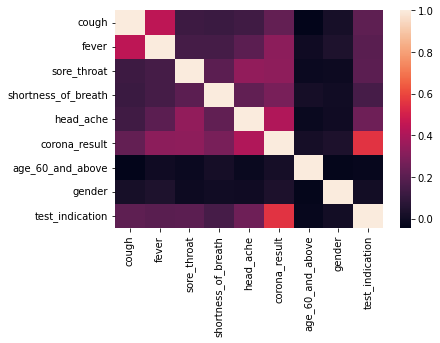

In [62]:
#plot a correlation heatmap for all variables in data1 
sns.heatmap(data_processed1.corr(), xticklabels=data_processed1.columns, yticklabels=data_processed1.columns)

<AxesSubplot:>

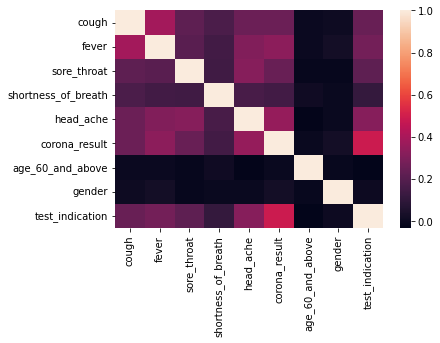

In [63]:
#plot a correlation heatmap for all variables in data2
sns.heatmap(data_processed2.corr(), xticklabels=data_processed2.columns, yticklabels=data_processed2.columns)

## Training and Testing for March - April 2020

In [64]:
#create a train test split

X1 = data_processed1.drop(['corona_result'],axis = 1)
y1 = data_processed1.copy()['corona_result']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2,random_state = 2022, stratify = y1)

In [65]:
#create the random forest model
rf_model1 = RandomForestClassifier()
rf_model1.fit(X_train1, y_train1)

RandomForestClassifier()

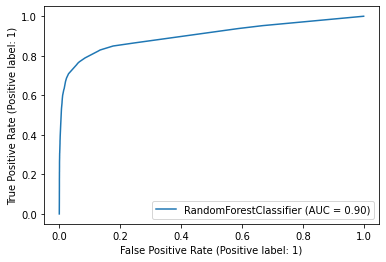

In [66]:
from sklearn.metrics import RocCurveDisplay
rf_disp1 = RocCurveDisplay.from_estimator(rf_model1, X_test1, y_test1)
plt.show()

In [67]:
#show the variable importance in the rf model
pd.DataFrame(rf_model1.feature_importances_, index=X_train1.columns).sort_values(by=0, ascending=False)

,0
test_indication,0.466695
head_ache,0.195909
sore_throat,0.110256
fever,0.092211
shortness_of_breath,0.078955
cough,0.042216
age_60_and_above,0.008447
gender,0.005311


## Testing our trained model on data from later in the year (September to November 2020)

In [68]:
#create a train test split

X2 = data_processed2.drop(['corona_result'],axis = 1)
y2 = data_processed2.copy()['corona_result']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2,random_state = 2022, stratify = y2)

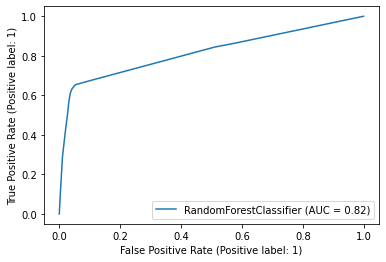

In [95]:
#test the model trained in March - April 2020 for September - November 2020
rf_disp2 = RocCurveDisplay.from_estimator(rf_model1, X_test2, y_test2)
plt.show()

## Retrain the model for the second half of the year and compare accuracy

In [70]:
#create the random forest model
rf_model2 = RandomForestClassifier()
rf_model2.fit(X_train2, y_train2)

RandomForestClassifier()

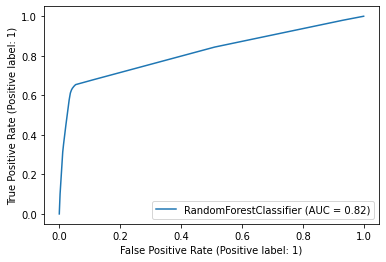

In [71]:
#test the model trained for September - November 2020
rf_disp2 = RocCurveDisplay.from_estimator(rf_model2, X_test2, y_test2)
plt.show()

In [72]:
#show the variable importance in the rf model
pd.DataFrame(rf_model1.feature_importances_, index=X_train1.columns).sort_values(by=0, ascending=False)

,0
test_indication,0.466695
head_ache,0.195909
sore_throat,0.110256
fever,0.092211
shortness_of_breath,0.078955
cough,0.042216
age_60_and_above,0.008447
gender,0.005311


## Tuning Parameters for our RF Model

In [73]:
#set list of parameters to tune our first model 

# Number of trees in random forest
n_estimators = np.linspace(5, 2000, int((2000-5)/10) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [74]:
#perform 5-fold cross validation against all parameter ranges set above to find optimal parameters for the rf model
#we will train and test each time on March - April 2020 data as this was just an accurate predictor of September - November 2020 data and easier to train

rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(X_train1, y_train1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END bootstrap=False, criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=1, n_estimators=1588; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=1, n_estimators=1588; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=1, n_estimators=1588; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=1, n_estimators=1588; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=1, n_estimators=1588; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=200, min_samples_leaf=1, min_samples_split=30, n_estimators=676; total time=  15.8s
[CV] END bootstrap=False, criterion=gini, max_depth=200, min_samples_leaf=1, min_samples_split=30, n_estimators=676; total time

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.9/site-packages/joblib/parallel.py", 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20, 30],
                                        'n_estimators': array([   5,   15,   25,   35,   45,   55,   65,   75,   85,   95,  105,
        115,  125,  135,  145,  155,  165,  175,  1...
       1328, 1338, 1348, 1358, 1368, 1378, 1388, 1398, 1408, 1418, 1428,
       1438, 1448, 1458, 1468, 1478, 1488, 1498, 1508, 1518, 1528, 1538,
       1548, 1558, 1568, 1578, 1588, 1598, 1609, 1619, 16

In [75]:
rf_random.best_params_

{'n_estimators': 987,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 100,
 'criterion': 'entropy',
 'bootstrap': True}

In [76]:
print(rf_random.score(X_train1, y_train1))

0.9580134819094787


In [77]:
print(rf_random.score(X_test1, y_test1))

0.9586558567812465


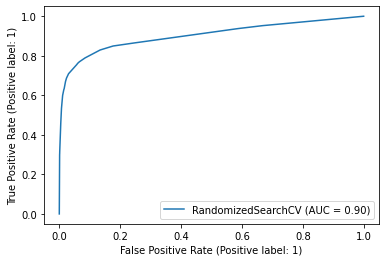

In [78]:
#test the model trained for March-April 2020
rf_disp3 = RocCurveDisplay.from_estimator(rf_random, X_test1, y_test1)
plt.show()

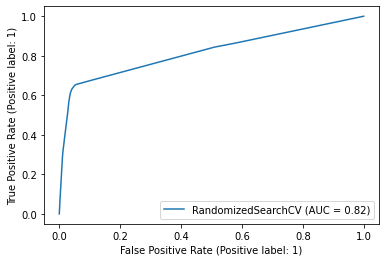

In [79]:
#test the model for September-November 2020
rf_disp4 = RocCurveDisplay.from_estimator(rf_random, X_test2, y_test2)
plt.show()

In [80]:
rf_best_params = RandomForestClassifier(n_estimators = 987,
 min_samples_split = 10,
 min_samples_leaf = 3,
 max_depth = 100,
 criterion = 'entropy',
 bootstrap = True)

In [81]:
rf_best_params.fit(X_train1, y_train1)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=987)

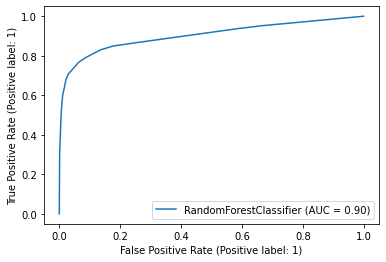

In [82]:
#test the model trained for March-April 2020
rf_disp5 = RocCurveDisplay.from_estimator(rf_best_params, X_test1, y_test1)
plt.show()

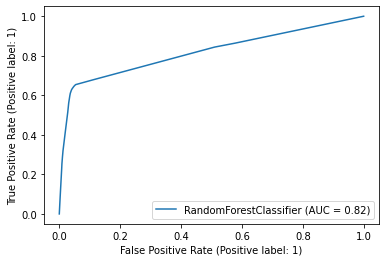

In [83]:
#test the model trained for September-November 2020
rf_disp6 = RocCurveDisplay.from_estimator(rf_best_params, X_test2, y_test2)
plt.show()

In [84]:
#show the variable importance in the rf model
pd.DataFrame(rf_best_params.feature_importances_, index=X_train1.columns).sort_values(by=0, ascending=False)

,0
test_indication,0.453558
head_ache,0.163782
fever,0.146011
sore_throat,0.085715
cough,0.072916
shortness_of_breath,0.061342
age_60_and_above,0.008427
gender,0.008248


## Testing Model with best parameters trained on March-April 2020 on March-April 2021 data

In [85]:
#load in March-April 2021 data
data3 = pd.read_csv('data/corona_tests_2021_mar.csv')
data3.head()

/var/folders/kt/92wnzvcj6qq_r6j3j19yp5lw0000gp/T/ipykernel_10129/3302323151.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv('data/corona_tests_2021_mar.csv')


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-04-30,0,0,0,0,0,negative,NaN,NaN,Other
1,2021-04-30,0,0,0,0,0,negative,NaN,NaN,Other
2,2021-04-30,0,0,0,0,0,negative,NaN,NaN,Other
3,2021-04-30,0,0,0,0,0,negative,NaN,NaN,Other
4,2021-04-30,0,0,0,0,0,negative,NaN,NaN,Other


In [86]:
data_processed3 = prepareData(data3)
data_processed3

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
257533,0,0,0,0,0,0.0,0,1,0
257534,0,0,0,0,0,0.0,0,0,0
257536,0,0,0,0,0,0.0,0,1,0
257537,0,0,0,0,0,0.0,0,1,0
257539,0,0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
429875,0,0,0,0,0,0.0,0,0,1
429876,0,0,0,0,0,0.0,0,1,0
429877,0,0,0,0,0,0.0,0,0,0
429878,0,0,0,0,0,0.0,0,1,0


In [87]:
#drop nas from the data
data_processed3.dropna(inplace = True)

In [88]:
#check there are no more nas
data_processed3.isna().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [89]:
#create a train test split for the 2021 data

X3 = data_processed3.drop(['corona_result'],axis = 1)
y3 = data_processed3.copy()['corona_result']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2,random_state = 2022, stratify = y3)

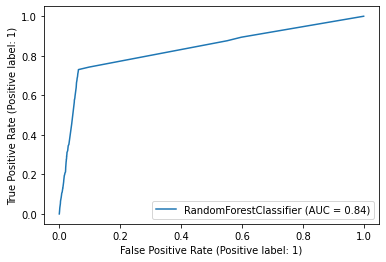

In [90]:
#test the best parameter model on the 2021 data
#test the model on March-April 2021 data
rf_disp6 = RocCurveDisplay.from_estimator(rf_best_params, X_test3, y_test3)
plt.show()

## Retrain the best parameter model on the 2021 data and check results

In [91]:
#train the model again on the 2021 data and check the AUC
rf_best_params.fit(X_train3, y_train3)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=987)

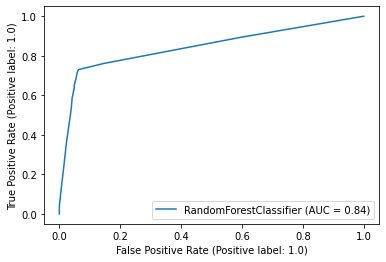

In [92]:
#test the model on March-April 2021 data
rf_disp7 = RocCurveDisplay.from_estimator(rf_best_params, X_test3, y_test3)
plt.show()